# Part 1: Installation and Environment Setup
### Anaconda Installation
1. Visit https://www.anaconda.com/download
2. Download and install Anaconda
3. Create a conda env (run "conda create --name pytorch-tutorial python=3.9")

### PyTorch Installation
1. Visit https://pytorch.org/get-started/locally/
2. Select the appropriate variables based on your system - note that pip and conda will install their own versions of relevant CUDA libraries, so no need to align with your NVIDIA version if looking to use GPU

### Other Required Libraries
1. pip install matplotlib
2. pip install numpy
3. pip install torchviz

# Part 2: PyTorch Background

### Check the device available

In [1]:
import torch

# Check the available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Running on: {device}")


Running on: cpu


/data/wilmott/anaconda3/envs/pytorch-tutorial/lib/python3.9/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


### Introduction to tensors


In [3]:
# Creating tensors in PyTorch

# From a list
tensor_from_list = torch.tensor([1, 2, 3, 4])
print("Tensor from list:", tensor_from_list)

# Using built-in functions
zeros_tensor = torch.zeros(2, 2)
print("\nZeros tensor:\n", zeros_tensor)

ones_tensor = torch.ones(2, 2)
print("\nOnes tensor:\n", ones_tensor)

random_tensor = torch.rand(2, 2)  # Uniformly distributed values between 0 and 1
print("\nRandom tensor:\n", random_tensor)



Tensor from list: tensor([1, 2, 3, 4])

Zeros tensor:
 tensor([[0., 0.],
        [0., 0.]])

Ones tensor:
 tensor([[1., 1.],
        [1., 1.]])

Random tensor:
 tensor([[0.6037, 0.0073],
        [0.7871, 0.4722]])


### Basic tensor operations


In [4]:
# Addition
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
result = a + b
print("Addition:", result)

# Multiplication (element-wise)
result = a * b
print("\nElement-wise multiplication:", result)

# Dot product
result = torch.dot(a, b)
print("\nDot product:", result)

# Matrix multiplication
matrix1 = torch.tensor([[1, 2], [3, 4]])
matrix2 = torch.tensor([[2, 0], [0, 2]])
result1 = torch.mm(matrix1, matrix2)  # For 2D matrices
print("\nMatrix multiplication:\n", result1)

result2 = matrix1*matrix2
print("\nElement-wise multiplication:\n", result2)


Addition: tensor([5, 7, 9])

Element-wise multiplication: tensor([ 4, 10, 18])

Dot product: tensor(32)

Matrix multiplication:
 tensor([[2, 4],
        [6, 8]])

Element-wise multiplication:
 tensor([[2, 0],
        [0, 8]])


### Tensor indexing and slicing


In [5]:

tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("\nOriginal tensor:\n", tensor)

# Getting a single value
print(tensor[0, 1])  # Outputs 2
print(tensor[0][1])  # Outputs 2

# Slicing
print(tensor[0, :])  # First row
print(tensor[0])  # First row

print(tensor[:, 0])  # First column
print(tensor[1:3, 1:3])  # Sub-matrix from rows 1 to 2 and columns 1 to 2


Original tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor(2)
tensor(2)
tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([1, 4, 7])
tensor([[5, 6],
        [8, 9]])


### Converting between Numpy and PyTorch tensors


In [6]:

# PyTorch tensor to Numpy array
numpy_array = tensor.numpy()
print("Numpy array:\n", numpy_array)

# Numpy array to PyTorch tensor
new_tensor = torch.from_numpy(numpy_array)
print("\nPyTorch tensor:\n", new_tensor)

# Note: The numpy array and the torch tensor will share the same memory location, 
# so changes to one will affect the other.

numpy_array[0, 0] = 0
print("Numpy array:\n", numpy_array)
print("\nPyTorch tensor:\n", new_tensor)


Numpy array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

PyTorch tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Numpy array:
 [[0 2 3]
 [4 5 6]
 [7 8 9]]

PyTorch tensor:
 tensor([[0, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### Reshape and View

In [7]:
# Create a sample tensor of shape [2, 3, 4]
tensor = torch.arange(24).reshape(2, 3, 4)
print(f"Original Tensor:\n{tensor}\n")

# 1. Using view to reshape the tensor to [3, 2, 4]
viewed_tensor = tensor.view(3, 2, 4)
print(f"Reshaped using view:\n{viewed_tensor}\n")

# 2. Using reshape to get the same result
reshaped_tensor = tensor.reshape(3, 2, 4)
print(f"Reshaped using reshape:\n{reshaped_tensor}\n")

# Demonstrating the use of -1 with view to infer a dimension
viewed_with_inference = tensor.view(-1, 4)  # Here, -1 will be inferred as 6 to ensure the total number of elements remains 24
print(f"Reshaped using view with dimension inference:\n{viewed_with_inference}\n")

# Note that reshape and view can both be used in similar manners. Reshape will return a view (i.e. a new array with the same memory location utilized as the original)
# However, this is not always the case. Reshape MIGHT make a copy if memory utilized by original tensor is non-contiguous. View never does.

Original Tensor:
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

Reshaped using view:
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]])

Reshaped using reshape:
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]])

Reshaped using view with dimension inference:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])



### Additional Tensor Operations

torch.Size([1, 28, 28])
torch.Size([28, 28])


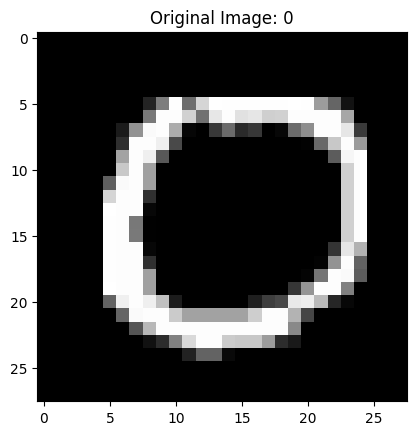

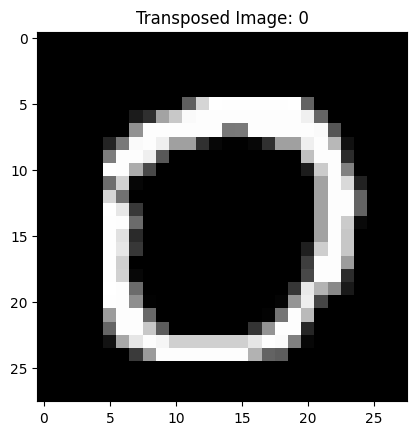

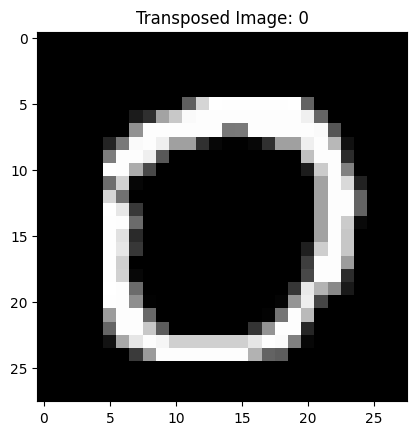

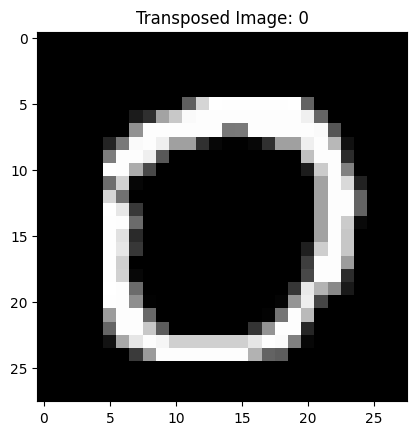

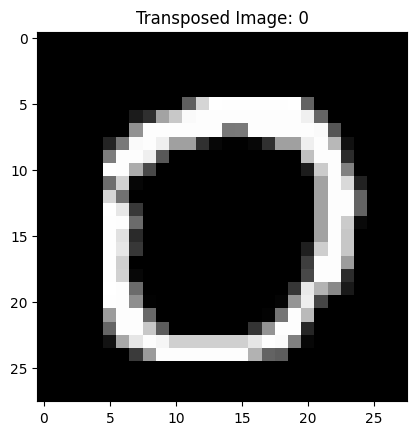

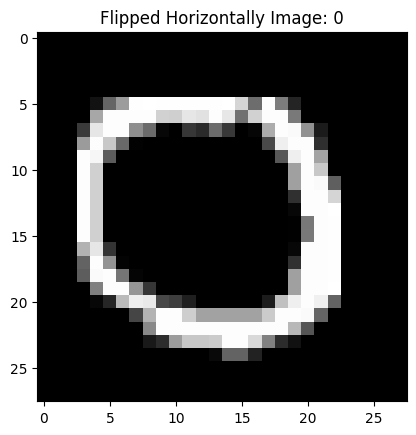

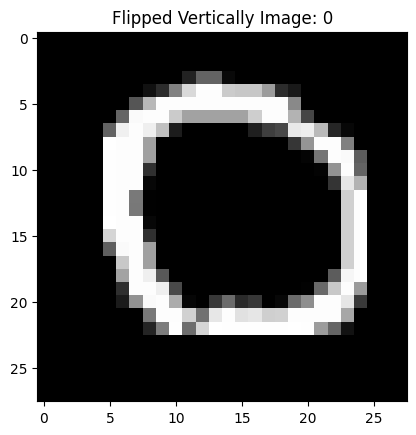

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch

# Set the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download the dataset
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Get a sample - taking *.item() of a pytorch tensor will attempt to convert a size-1 tensor to a scalar
rand_idx = torch.randint(low=0, high=len(mnist_trainset)-1, size=(1,)).item()
mnist_sample, mnist_label = mnist_trainset[rand_idx]

# Get the sample dimensions
print(mnist_sample.shape)
mnist_sample = mnist_sample.squeeze(0)
print(mnist_sample.shape)


# Function to display tensor images
def imshow(tensor_img, title=None):
    # Un-normalize and convert from Tensor to numpy
    img = tensor_img * 0.5 + 0.5
    img = img.numpy().squeeze()
    plt.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

# Display the original image
imshow(mnist_sample, title=f'Original Image: {mnist_label}')

# Transpose the image (1)
transposed_img = torch.transpose(mnist_sample, 0, 1)
imshow(transposed_img, title=f'Transposed Image: {mnist_label}')
# Transpose the image (2)
transposed_img = mnist_sample.transpose(0, 1)
imshow(transposed_img, title=f'Transposed Image: {mnist_label}')
# Transpose the image (3)
transposed_img = mnist_sample.T
imshow(transposed_img, title=f'Transposed Image: {mnist_label}')
# Transpose the image (4)
transposed_img = mnist_sample.permute(1, 0)
imshow(transposed_img, title=f'Transposed Image: {mnist_label}')


# Flip the image horizontally
flipped_horizontal_img = torch.flip(mnist_sample, [1])
imshow(flipped_horizontal_img, title=f'Flipped Horizontally Image: {mnist_label}')

# Flip the image vertically
flipped_vertical_img = torch.flip(mnist_sample, [0])
imshow(flipped_vertical_img, title=f'Flipped Vertically Image: {mnist_label}')


Files already downloaded and verified
torch.Size([3, 32, 32])


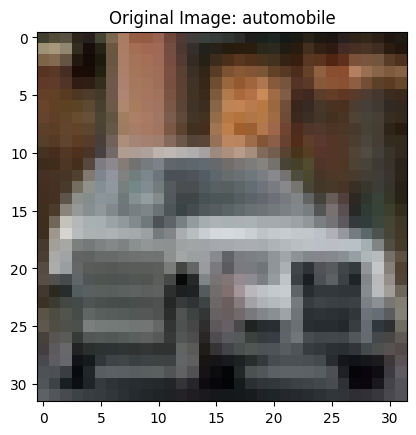

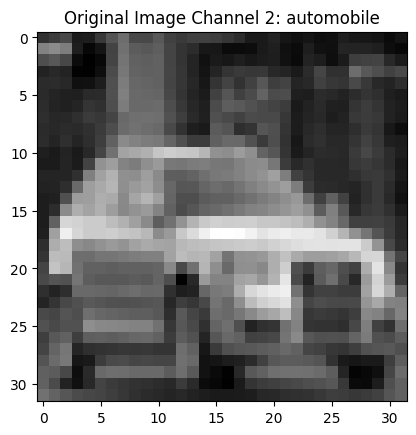

torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 1, 32])
torch.Size([3, 32, 32])


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch

# Set the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download the dataset
cifar10_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Mapping of CIFAR10 class indices to human-readable labels
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Get a random sample
rand_idx = torch.randint(low=0, high=len(cifar10_trainset)-1, size=(1,)).item()
sample, label = cifar10_trainset[rand_idx]

# Function to display tensor images
def imshow_rgb(tensor_img, title=None):
    # Un-normalize and convert from Tensor to numpy
    img = tensor_img.permute(1, 2, 0)  # change from CxHxW to HxWxC
    img = img * 0.5 + 0.5  # Un-normalize
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.show()


# Print the dimensions of the sample
print(sample.shape)

# Display the original image
imshow_rgb(sample, title=f'Original Image: {class_names[label]}')

channel = 2
# Display a channel of the image
imshow(sample[channel], title=f'Original Image Channel {channel}: {class_names[label]}')

# Unsqueeze and squeeze
# We create an extra dimension at index 0 (to add a batch dimension, for example)
sample = sample.unsqueeze(0)
print(sample.shape)
# For sake of demonstration, lets unsqueeze at another dimension to see the functionality of the squeeze operation
sample = sample.unsqueeze(3)
print(sample.shape)
# If we now call squeeze on our sample of dimension 1x3x32x1x32
sample = sample.squeeze()
print(sample.shape)
# You can see that all dimensions with a size of 1 are removed. Specific indices can also be specified/provided to squeeze if we want to target a dimension to remove



### Gradient Propagation

In [10]:
# Define two tensors with requires_grad=True, which means they'll track the operations performed on them
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Perform a simple operation
z = x * y

# Compute gradients
z.backward()

# Print gradients
print(f"Gradient of z w.r.t. x: {x.grad}")
print(f"Gradient of z w.r.t. y: {y.grad}")

# Detach a tensor from the computation graph
w = z.detach()

# Perform another operation on the detached tensor
u = w * 2

# Try backward on u (this won't compute gradients for x and y since w is detached)
# u.backward()  # This will give an error, demonstrating that w doesn't have gradient tracking

print(f"Gradient of u w.r.t. x: {x.grad}")  # This won't change from the previous value
print(f"Gradient of u w.r.t. y: {y.grad}")  # This won't change from the previous value


Gradient of z w.r.t. x: 3.0
Gradient of z w.r.t. y: 2.0
Gradient of u w.r.t. x: 3.0
Gradient of u w.r.t. y: 2.0


In [ ]:
import torch
from torchviz import make_dot

# Define two tensors
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)

# Perform some operations
c = a * b
d = c ** 2

# Compute gradients for 'd'
d.backward()

# Visualize the computation graph
dot = make_dot(d, params={"a": a, "b": b})
dot.view()


# Part 3: MNIST Example

Epoch 1/10, Loss: 0.4069, Train Acc: 93.56%, Val Acc: 92.72%
Epoch 2/10, Loss: 0.2135, Train Acc: 94.79%, Val Acc: 94.17%
Epoch 3/10, Loss: 0.1635, Train Acc: 96.06%, Val Acc: 95.20%
Epoch 4/10, Loss: 0.1349, Train Acc: 96.37%, Val Acc: 95.37%
Epoch 5/10, Loss: 0.1197, Train Acc: 96.81%, Val Acc: 95.67%
Epoch 6/10, Loss: 0.1066, Train Acc: 97.16%, Val Acc: 96.22%
Epoch 7/10, Loss: 0.0976, Train Acc: 97.02%, Val Acc: 96.07%
Epoch 8/10, Loss: 0.0896, Train Acc: 97.69%, Val Acc: 96.30%
Epoch 9/10, Loss: 0.0817, Train Acc: 98.07%, Val Acc: 96.47%
Epoch 10/10, Loss: 0.0763, Train Acc: 97.77%, Val Acc: 96.60%
Finished Training


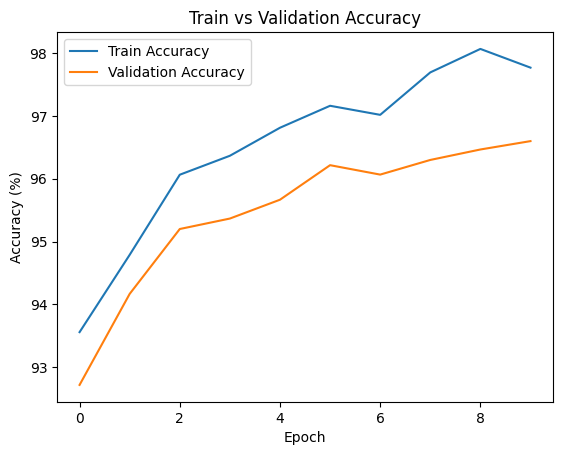

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        # By using -1, we ask pytorch to infer the batch size assuming the feature dimension of 28x28
        x = x.view(-1, 28*28)
        # Can also use flatten, and specify start dim of 1 to indicate we want to keep batch dim
        # End dim is -1 by default, but adding here for clarity
        # x = x.flatten(start_dim=1, end_dim=-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net().to(device)

# Define loss function and optimizer


def get_accuracy(loader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


def train(net, num_epochs=20, save_name='mnist_model.pth'):

    # Load MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    full_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    # Splitting into train and validation sets: 90% train, 10% validation
    train_size = int(0.9 * len(full_trainset))
    val_size = len(full_trainset) - train_size
    trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, val_size])


    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
    valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False, num_workers=2)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    # Train the network

    train_accuracies = []
    val_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader, 0):
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
        train_acc = get_accuracy(trainloader, net)
        val_acc = get_accuracy(valloader, net)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader):.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

    print("Finished Training")
    # Save the model
    torch.save(net.state_dict(), save_name)
    return train_accuracies, val_accuracies
train_accuracies, val_accuracies = train(net, num_epochs=10, save_name='dense_mnist_classifier.pth')

def visualize_train_val_accuracy(train_accuracies, val_accuracies):
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Train vs Validation Accuracy')
    plt.legend()
    plt.show()

visualize_train_val_accuracy(train_accuracies, val_accuracies)

Epoch 1/10, Loss: 0.3587, Train Acc: 97.12%, Val Acc: 96.93%
Epoch 2/10, Loss: 0.0741, Train Acc: 98.28%, Val Acc: 98.05%
Epoch 3/10, Loss: 0.0524, Train Acc: 98.69%, Val Acc: 98.30%
Epoch 4/10, Loss: 0.0416, Train Acc: 99.06%, Val Acc: 98.55%
Epoch 5/10, Loss: 0.0356, Train Acc: 99.15%, Val Acc: 98.63%
Epoch 6/10, Loss: 0.0301, Train Acc: 99.39%, Val Acc: 98.88%
Epoch 7/10, Loss: 0.0244, Train Acc: 99.35%, Val Acc: 98.87%
Epoch 8/10, Loss: 0.0213, Train Acc: 99.58%, Val Acc: 98.93%
Epoch 9/10, Loss: 0.0173, Train Acc: 99.61%, Val Acc: 99.12%
Epoch 10/10, Loss: 0.0163, Train Acc: 99.58%, Val Acc: 98.83%
Finished Training


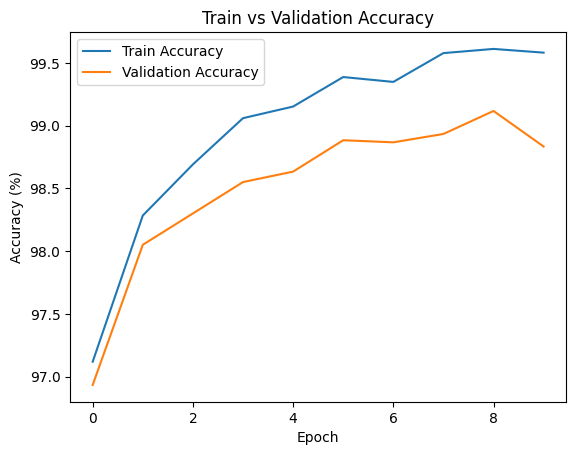

In [9]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)   # Input: 1x28x28, Output: 32x28x28
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)  # Input: 32x28x28, Output: 64x28x28
        
        # Max pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)        # Input: 64x28x28, Output: 64x14x14
        
        # Fully connected layers (after two conv and one pool layer)
        self.fc1 = nn.Linear(16 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Apply first convolutional layer, followed by ReLU and max pooling
        x = self.pool(torch.relu(self.conv1(x)))  # Output size: 32x14x14
        
        # Apply second convolutional layer, followed by ReLU and max pooling
        x = self.pool(torch.relu(self.conv2(x)))  # Output size: 64x7x7
        # Flatten the tensor
        x = x.view(-1, 16 * 7 * 7)

        # Apply first fully connected layer with ReLU
        x = torch.relu(self.fc1(x))
        
        # Apply second fully connected layer
        x = self.fc2(x)
        
        return x

convnet = ConvNet().to(device)
train_accuracies, val_accuracies = train(convnet, num_epochs=10, save_name='conv_mnist_classifier.pth')

visualize_train_val_accuracy(train_accuracies, val_accuracies)

In [10]:
def print_trainable_parameters(model):
    total_params = 0
    for name, param in model.named_parameters():
        if param.requires_grad:  # ensures only trainable parameters are counted
            num_params = param.numel()  # returns total number of elements
            total_params += num_params
            print(f"{name: <20}: {num_params}")
    print(f"Total trainable parameters: {total_params}")


print_trainable_parameters(net)
print_trainable_parameters(convnet)


fc1.weight          : 50176
fc1.bias            : 64
fc2.weight          : 640
fc2.bias            : 10
Total trainable parameters: 50890
conv1.weight        : 72
conv1.bias          : 8
conv2.weight        : 1152
conv2.bias          : 16
fc1.weight          : 50176
fc1.bias            : 64
fc2.weight          : 640
fc2.bias            : 10
Total trainable parameters: 52138


# Part 4: More Complex MNIST

In [11]:
class PairedMNISTDataset(torch.utils.data.Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __len__(self):
        return len(self.mnist_dataset) // 2  # We'll use pairs, so we return half the length

    def __getitem__(self, index):
        image1, label1 = self.mnist_dataset[2*index]
        image2, label2 = self.mnist_dataset[2*index + 1]
        return (image1, image2), label1 + label2



In [12]:
def get_accuracy(loader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for (image1, image2), labels in loader:
            image1, image2, labels = image1.to(device), image2.to(device), labels.to(device)
            outputs = net((image1, image2))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


In [13]:
def train(net, num_epochs=20, save_name='mnist_model.pth'):

    # Load MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    full_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    # Splitting into train and validation sets: 90% train, 10% validation
    train_size = int(0.9 * len(full_trainset))
    val_size = len(full_trainset) - train_size
    trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, val_size])

    paired_trainset = PairedMNISTDataset(trainset)
    paired_valset = PairedMNISTDataset(valset)

    trainloader = torch.utils.data.DataLoader(paired_trainset, batch_size=64, shuffle=True, num_workers=2)
    valloader = torch.utils.data.DataLoader(paired_valset, batch_size=64, shuffle=False, num_workers=2)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    # Train the network

    train_accuracies = []
    val_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, ((image1, image2), labels) in enumerate(trainloader, 0):
            image1, image2, labels = image1.to(device), image2.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = net((image1, image2))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
        train_acc = get_accuracy(trainloader, net)
        val_acc = get_accuracy(valloader, net)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader):.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

    print("Finished Training")
    # Save the model
    torch.save(net.state_dict(), save_name)
    return train_accuracies, val_accuracies

In [19]:
class PairedMNISTNet(nn.Module):
    def __init__(self):
        super(PairedMNISTNet, self).__init__()

        # First image branch
        self.branch1 = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Second image branch (same as the first)
        self.branch2 = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Fully connected layers (after two conv and one pool layer)
        self.fc1 = nn.Linear(16 * 7 * 7 * 2, 500)
        self.fc2 = nn.Linear(500, 19)

    def forward(self, x):
        x1, x2 = x  # Split the input into the two images
        x1 = self.branch1(x1)
        x2 = self.branch2(x2)

        # Concatenate the feature maps and feed through fully connected layers
        x = torch.cat((x1.view(x1.size(0), -1), x2.view(x2.size(0), -1)), dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

pairednet1 = PairedMNISTNet().to(device)


In [20]:
train_accuracies, val_accuracies = train(pairednet1, num_epochs=10, save_name='pairednet_2branch.pth')

Epoch 1/10, Loss: 2.5689, Train Acc: 31.14%, Val Acc: 30.20%
Epoch 2/10, Loss: 1.3694, Train Acc: 75.93%, Val Acc: 73.50%
Epoch 3/10, Loss: 0.5426, Train Acc: 88.34%, Val Acc: 85.30%
Epoch 4/10, Loss: 0.3217, Train Acc: 92.95%, Val Acc: 88.13%
Epoch 5/10, Loss: 0.2245, Train Acc: 94.97%, Val Acc: 90.13%
Epoch 6/10, Loss: 0.1621, Train Acc: 95.75%, Val Acc: 90.00%
Epoch 7/10, Loss: 0.1127, Train Acc: 97.44%, Val Acc: 90.97%
Epoch 8/10, Loss: 0.0772, Train Acc: 97.65%, Val Acc: 90.63%
Epoch 9/10, Loss: 0.0535, Train Acc: 98.67%, Val Acc: 91.60%
Epoch 10/10, Loss: 0.0365, Train Acc: 99.03%, Val Acc: 91.37%
Finished Training


In [21]:
class PairedMNISTNet(nn.Module):
    def __init__(self, pretrained_classifier):
        super(PairedMNISTNet, self).__init__()
        
        # Use the feature extraction part of the pre-trained classifier
        self.mnist_classifier = pretrained_classifier

    def forward(self, x):
        x1, x2 = x  # Split the input into the two images
        
        x1 = self.mnist_classifier(x1)
        x2 = self.mnist_classifier(x2)

        # Sum the output probabilities
        sum_indices = torch.add(torch.argmax(x1, dim=1), torch.argmax(x2, dim=1))

        # Convert to one-hot encoded vectors
        x = torch.zeros(sum_indices.size(0), 19, device=x1.device).scatter_(1, sum_indices.unsqueeze(-1), 1.0)
        return x


# We cannot train this one
mnist_classifier = ConvNet().to(device)
mnist_classifier.load_state_dict(torch.load('conv_mnist_classifier.pth'))
pairednet2 = PairedMNISTNet(mnist_classifier).to(device)


In [22]:
def evaluate(net, batch_size=64):
    # Load MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # Convert testset to PairedMNISTDataset
    paired_testset = PairedMNISTDataset(testset)
    testloader = torch.utils.data.DataLoader(paired_testset, batch_size=batch_size, shuffle=False, num_workers=2)

    net.eval()  # Set the network to evaluation mode

    correct = 0
    total = 0
    with torch.no_grad():
        for (image1, image2), labels in testloader:
            image1, image2, labels = image1.to(device), image2.to(device), labels.to(device)

            outputs = net((image1, image2))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy


In [23]:
# Evaluate the network on the test set
test_accuracy1 = evaluate(pairednet1)
print(f"Accuracy on test set with network trained from scratch: {test_accuracy1:.2f}%")

test_accuracy2 = evaluate(pairednet2)
print(f"Accuracy on test set with network trained on raw MNIST: {test_accuracy2:.2f}%")


Accuracy on test set with network trained from scratch: 91.72%
Accuracy on test set with network trained on raw MNIST: 97.84%


# Part 5: Final MNIST Example with Multiple Losses

In [24]:
class PairedMNISTDataset(torch.utils.data.Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __len__(self):
        return len(self.mnist_dataset) // 2  # We'll use pairs, so we return half the length

    def __getitem__(self, index):
        image1, label1 = self.mnist_dataset[2*index]
        image2, label2 = self.mnist_dataset[2*index + 1]
        return (image1, image2), (label1, label2, label1 + label2)



In [33]:
class PairedMNISTNet(nn.Module):
    def __init__(self):
        super(PairedMNISTNet, self).__init__()
        
        # Use the feature extraction part of the pre-trained classifier
        self.mnist_classifier = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(16 * 7 * 7, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x1, x2 = x  # Split the input into the two images
        x1 = self.mnist_classifier(x1)
        x2 = self.mnist_classifier(x2)

        # Sum the output probabilities
        sum_indices = torch.add(torch.argmax(x1, dim=1), torch.argmax(x2, dim=1))

        # Convert to one-hot encoded vectors
        x_pred = torch.zeros(sum_indices.size(0), 19, device=x1.device).scatter_(1, sum_indices.unsqueeze(-1), 1.0)
        return x1, x2, x_pred
pairednet3 = PairedMNISTNet().to(device)


In [43]:
def get_accuracy(loader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for (image1, image2), (labels1, labels2, labels_pred) in loader:
            image1, image2, labels1, labels2, labels_pred = image1.to(device), image2.to(device), labels1.to(device), labels2.to(device), labels_pred.to(device)
            outputs1, outputs2, out_pred = net((image1, image2))
            _, predicted = torch.max(out_pred.data, 1)
            total += labels_pred.size(0)
            correct += (predicted == labels_pred).sum().item()
    return 100 * correct / total


In [44]:
def evaluate(net, batch_size=64):
    # Load MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # Convert testset to PairedMNISTDataset
    paired_testset = PairedMNISTDataset(testset)
    testloader = torch.utils.data.DataLoader(paired_testset, batch_size=batch_size, shuffle=False, num_workers=2)

    net.eval()  # Set the network to evaluation mode

    correct = 0
    total = 0
    with torch.no_grad():
        for (image1, image2), (labels1, labels2, labels_pred) in testloader:
            image1, image2, labels1, labels2, labels_pred = image1.to(device), image2.to(device), labels1.to(device), labels2.to(device), labels_pred.to(device)

            outputs1, outputs2, out_pred = net((image1, image2))
            _, predicted = torch.max(out_pred.data, 1)
            total += labels_pred.size(0)
            correct += (predicted == labels_pred).sum().item()

    accuracy = 100 * correct / total
    return accuracy


In [45]:
def train(net, num_epochs=20, save_name='mnist_model.pth'):

    # Load MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    full_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    # Splitting into train and validation sets: 90% train, 10% validation
    train_size = int(0.9 * len(full_trainset))
    val_size = len(full_trainset) - train_size
    trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, val_size])

    paired_trainset = PairedMNISTDataset(trainset)
    paired_valset = PairedMNISTDataset(valset)

    trainloader = torch.utils.data.DataLoader(paired_trainset, batch_size=64, shuffle=True, num_workers=2)
    valloader = torch.utils.data.DataLoader(paired_valset, batch_size=64, shuffle=False, num_workers=2)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    # Train the network

    train_accuracies = []
    val_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, ((image1, image2), (labels1, labels2, labels_pred)) in enumerate(trainloader, 0):
            image1, image2, labels1, labels2, labels_pred = image1.to(device), image2.to(device), labels1.to(device), labels2.to(device), labels_pred.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs1, outputs2, out_pred = net((image1, image2))
            loss1 = criterion(outputs1, labels1)
            loss2 = criterion(outputs2, labels2)
            loss = loss1 + loss2
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
        train_acc = get_accuracy(trainloader, net)
        val_acc = get_accuracy(valloader, net)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader):.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

    print("Finished Training")
    # Save the model
    torch.save(net.state_dict(), save_name)
    return train_accuracies, val_accuracies

In [46]:
train_accuracies, val_accuracies = train(pairednet3, num_epochs=10, save_name='pairednet_multiloss.pth')

Epoch 1/10, Loss: 0.0847, Train Acc: 98.16%, Val Acc: 97.87%
Epoch 2/10, Loss: 0.0667, Train Acc: 98.44%, Val Acc: 98.07%
Epoch 3/10, Loss: 0.0521, Train Acc: 98.54%, Val Acc: 97.93%
Epoch 4/10, Loss: 0.0439, Train Acc: 98.89%, Val Acc: 98.10%
Epoch 5/10, Loss: 0.0356, Train Acc: 99.34%, Val Acc: 98.27%
Epoch 6/10, Loss: 0.0306, Train Acc: 99.49%, Val Acc: 98.33%
Epoch 7/10, Loss: 0.0261, Train Acc: 99.45%, Val Acc: 98.20%
Epoch 8/10, Loss: 0.0225, Train Acc: 99.24%, Val Acc: 97.87%
Epoch 9/10, Loss: 0.0170, Train Acc: 99.54%, Val Acc: 98.23%
Epoch 10/10, Loss: 0.0148, Train Acc: 99.68%, Val Acc: 98.27%
Finished Training


In [48]:
test_accuracy3 = evaluate(pairednet3)
print(f"Accuracy on test set with network trained from scratch with multiple losses: {test_accuracy3:.2f}%")

Accuracy on test set with network trained from scratch with multiple losses: 98.08%
